# Rate constrained Fairness

This notebook shows how to enforce demographic parity at a particular selection rate.
We use the result of  et al that maximizing a monotone objective (e.g., recall, precision, selection rate) for the worst off group, when combined with a global selection rate constraint, will result in equality with respect to this measure between groups.

In [1]:
import oxonfair 
from oxonfair import group_metrics as gm
import xgboost
from matplotlib import pyplot as plt

In [2]:
# Load dataset and train XGBoost classifier
train,val,test = oxonfair.dataset_loader.adult()
pred = xgboost.XGBClassifier().fit(X=train['data'],y=train['target'])

In [4]:
# We're going to train two 'fair' classifiers
# fpred will be a standard fairness classifier with per group thresholds
# fpred2 will be a classifier with one single threshold
# This will let us reuse the existing thresholding a plotting capabilities of Oxonfair
fpred = oxonfair.FairPredictor(pred, val)
fpred2 = oxonfair.FairPredictor(pred, val, inferred_groups=oxonfair.single_threshold)


Some groups were not assigned, we only saw: [1]


In [16]:
#It doesn't really matter what we use as an objective for fpred2 as there's only one threshold, and the frontier always looks the same.set
# What matters is that it's monotone increasing. 
# Recall would be fine, as would precision if you flipped the sign (greater_is_better_obj=False). 
# Accuracy will only generate a partial frontier, as it's not monotone.
fpred.fit(gm.pos_pred_rate.min,gm.pos_pred_rate,0.4,greater_is_better_const=False,grid_width=500) 
#We need very fine grid search for low selection rates
fpred2.fit(gm.pos_pred_rate,gm.pos_pred_rate,0.4,greater_is_better_const=False,grid_width=500)

Some groups were not assigned, we only saw: [1]


Text(0.5, 1.0, 'Adult Test Set')

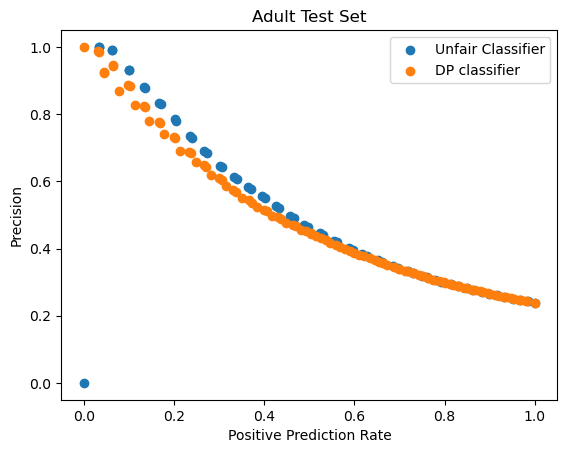

In [17]:
# Plot precision.
# We don't plot accuracy because it's not very good for low selection rates
fpred2.plot_frontier(test,objective1=gm.precision,objective2=gm.pos_pred_rate,new_plot=False,name_frontier='Unfair Classifier',show_original=False,show_updated=False)
fpred.plot_frontier(test,objective1=gm.precision,objective2=gm.pos_pred_rate,name_frontier='DP classifier',show_original=False,show_updated=False,new_plot=False)
plt.title('Adult Test Set')
# plt.savefig('./rate_constrained_demographic_parity.pdf')

/Users/chris.russell/code/oxon-fair/src/oxonfair/utils/group_metric_classes.py:187: RuntimeWarning: divide by zero encountered in divide
  broadcast = val[:, np.newaxis, :] / val[:, :, np.newaxis]
/Users/chris.russell/code/oxon-fair/src/oxonfair/utils/group_metric_classes.py:187: RuntimeWarning: invalid value encountered in divide
  broadcast = val[:, np.newaxis, :] / val[:, :, np.newaxis]
/Users/chris.russell/code/oxon-fair/src/oxonfair/utils/group_metric_classes.py:188: RuntimeWarning: divide by zero encountered in divide
  trunc = np.minimum(broadcast, 1.0/broadcast)
/Users/chris.russell/code/oxon-fair/src/oxonfair/utils/group_metric_classes.py:187: RuntimeWarning: invalid value encountered in divide
  broadcast = val[:, np.newaxis, :] / val[:, :, np.newaxis]


Text(0.5, 1.0, 'Adult Test Set')

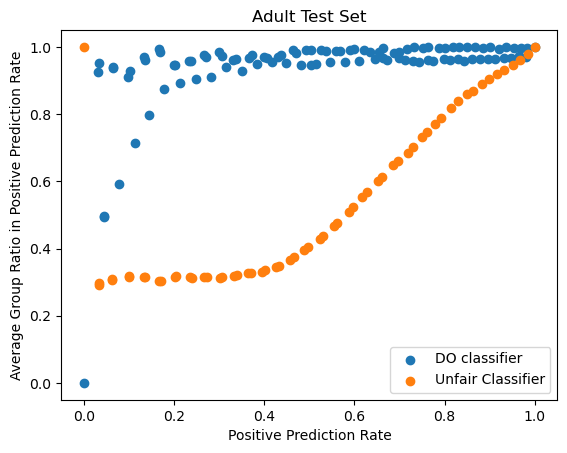

In [18]:
#Plot ratios of selection rates
fpred.plot_frontier(test,objective1=gm.pos_pred_rate.ratio,objective2=gm.pos_pred_rate,name_frontier='DO classifier',show_original=False,show_updated=False)
fpred2.plot_frontier(test,objective1=gm.pos_pred_rate.ratio,new_plot=False,name_frontier='Unfair Classifier',show_original=False,show_updated=False)
plt.title('Adult Test Set')
# plt.savefig('./rate_constrained_group_ratio.pdf')

Text(0.5, 1.0, 'Adult Test Set')

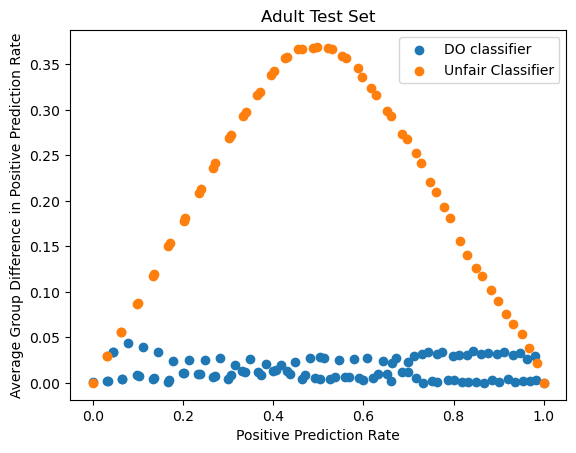

In [19]:
# Here we plot how difference in per-group selection rate varies with 
fpred.plot_frontier(test,objective1=gm.pos_pred_rate.diff,objective2=gm.pos_pred_rate,name_frontier='DO classifier',show_original=False,show_updated=False)
fpred2.plot_frontier(test,objective1=gm.pos_pred_rate.diff,new_plot=False,name_frontier='Unfair Classifier',show_original=False,show_updated=False)
plt.title('Adult Test Set')
